In [147]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import statistics as stat

from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show, ColumnDataSource

%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
engine = create_engine('sqlite:///fund.db')
output_notebook()

Loading BokehJS ...

In [148]:
def getTimeStamp(date):
    return int(pd.read_sql(sql='select strftime("%s",?)', con=engine, params=[date]).loc[0][0])

In [149]:
def getNAV(names,start,end):
    date = pd.read_sql(sql='select distinct date from price where date between ? and ? order by date asc',
                       con=engine,index_col='date', params=[start,end]).index
    NAV = np.zeros((len(names),len(date)))
    for j in range (len(names)):
        temp = pd.read_sql(sql='select * from price where id = ? and date between ? and ? order by date asc',
                   con=engine,index_col='date', params=[names[j],start,end])
        NAV[j][0] = temp.iloc[0]['NAV']
        for i,day in enumerate(date[1:]):
            try:
                NAV[j][i+1] = temp.loc[day]['NAV']
            except:
                NAV[j][i+1] = NAV[j][i]
    return NAV

In [150]:
def poolDecide(year):
    start = getTimeStamp(year + '-12-01')
    end = getTimeStamp(year + '-12-31')
    names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
    names = names['id'].sample(n=300).values
    return names

In [151]:
year = input("請輸入欲回測年：")
past_year = str(int(year)-1)
start = getTimeStamp(year+'-01-01')
end = getTimeStamp(year+'-12-31')

請輸入欲回測年：2015


# 0. 抓出0050各項數據

## 一. 淨值

In [152]:
NAV_0050 = getNAV(['0050 元大台灣50'], start, end)[0]

In [153]:
NAV_0050

array([66.83, 64.85, 65.15, 66.59, 66.17, 65.81, 66.18, 65.61, 65.6 ,
       65.8 , 66.46, 66.84, 67.5 , 67.71, 68.89, 69.  , 69.4 , 69.31,
       68.47, 67.83, 68.23, 68.79, 69.4 , 69.32, 68.78, 68.51, 68.22,
       69.05, 69.36, 69.59, 70.35, 71.  , 70.12, 69.82, 69.9 , 70.09,
       69.72, 70.05, 69.14, 68.96, 69.  , 69.59, 69.4 , 68.65, 69.05,
       70.18, 70.83, 70.93, 71.06, 70.71, 70.28, 69.67, 68.46, 68.79,
       69.29, 68.67, 69.5 , 69.68, 69.01, 69.1 , 69.67, 69.92, 69.51,
       68.68, 69.87, 69.  , 69.02, 69.09, 69.67, 71.3 , 72.57, 72.92,
       72.72, 71.64, 71.12, 71.46, 71.31, 71.18, 70.31, 70.41, 70.57,
       70.6 , 71.04, 70.13, 70.09, 70.54, 71.31, 71.05, 70.26, 70.78,
       70.93, 71.07, 71.22, 71.4 , 71.22, 70.47, 70.38, 70.07, 68.63,
       68.58, 68.75, 67.94, 68.55, 68.84, 68.94, 68.55, 68.32, 68.22,
       68.2 , 69.22, 69.64, 69.75, 70.42, 70.33, 68.92, 69.74, 70.11,
       70.17, 70.15, 69.37, 69.39, 67.45, 66.98, 68.  , 68.07, 68.54,
       68.47, 68.57,

## 二.配息

In [154]:
interest_0050 = (pd.read_sql(sql='select interest from interest where date between ? and ? and id = "0050 元大台灣50"'
                                ,con = engine, params=[start,end])['interest'].sum())

In [155]:
interest_0050

2.0

## 三. 漲跌幅

In [156]:
rate_0050 = []
rate_0050.append(0)
for i in range (len(NAV_0050)-1):
    rate_0050.append((NAV_0050[i+1] - NAV_0050[i]) / NAV_0050[i])

In [157]:
rate_0050

[0,
 -0.029627412838545624,
 0.00462606013878198,
 0.022102839600920916,
 -0.006307253341342569,
 -0.005440531963125275,
 0.00562224585929197,
 -0.008612873980054508,
 -0.00015241579027595057,
 0.0030487804878049215,
 0.010030395136778064,
 0.00571772494733689,
 0.009874326750448782,
 0.0031111111111110186,
 0.017427263328902775,
 0.0015967484395412895,
 0.005797101449275445,
 -0.0012968299711816052,
 -0.012119463280911895,
 -0.00934715933985688,
 0.005897095680377498,
 0.008207533343104239,
 0.00886756796045936,
 -0.0011527377521615633,
 -0.0077899596076167355,
 -0.0039255597557428905,
 -0.004232958692161819,
 0.012166520082087339,
 0.004489500362056514,
 0.003316032295271107,
 0.010921109354792223,
 0.00923951670220335,
 -0.012394366197183034,
 -0.00427837992013707,
 0.0011458034947008382,
 0.0027181688125893807,
 -0.005278927093736689,
 0.004733218588640251,
 -0.012990720913633071,
 -0.0026034133641887015,
 0.0005800464037123877,
 0.008550724637681209,
 -0.002730277338698056,
 -0.01

## 四. 收益率

In [158]:
profit_0050 = []
for i in range(len(NAV_0050)):
    profit_0050.append((NAV_0050[i] - NAV_0050[0]) / NAV_0050[0] * 100)
profit_0050[-1] += interest_0050

In [159]:
profit_0050

[0.0,
 -2.9627412838545624,
 -2.5138410893311276,
 -0.35912015561872646,
 -0.9875804279515137,
 -1.5262606613796141,
 -0.9726170881340588,
 -1.8255274577285634,
 -1.8404907975460183,
 -1.5412240011970688,
 -0.5536435732455552,
 0.014963339817454908,
 1.0025437677689686,
 1.3167739039353517,
 3.0824480023941376,
 3.247044740386057,
 3.8455783330839557,
 3.7109082747269246,
 2.4539877300613506,
 1.4963339817447254,
 2.0948675744426244,
 2.932814604219674,
 3.8455783330839557,
 3.7258716145443587,
 2.917851264402219,
 2.513841089331149,
 2.079904234625169,
 3.3218614394732886,
 3.785724973814157,
 4.12988178961545,
 5.267095615741427,
 6.239712703875508,
 4.922938799940156,
 4.474038605416721,
 4.593745323956319,
 4.878048780487813,
 4.324405207242258,
 4.8181954212180145,
 3.4565314978303197,
 3.1871913811162584,
 3.247044740386057,
 4.12988178961545,
 3.8455783330839557,
 2.7233278467754114,
 3.3218614394732886,
 5.012718838844843,
 5.985335926978902,
 6.134969325153388,
 6.329492742780

# 1. 決定基金池

In [160]:
start = getTimeStamp(past_year + '-12-01')
end = getTimeStamp(past_year + '-12-31')
names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
names = names['id'].sample(n=300).values

In [161]:
names

array(['T0737H 瀚亞全球高收債AC', 'ALZ42 聯博房貸收益AXe', 'ISZA7 景順亞洲平衡A$',
       'PIZ62 鋒裕領先歐企B2', 'PYZ39 施羅德日本A1aJP', 'ALZ79 聯博美國成長S1e',
       'PYZG3 施羅環歐收A1dEU', 'ALZCT 聯博亞股AD$', 'ALZW6 聯博日本價值A.$',
       'EUZ44 歐義環智慧股R2', 'MFZK2 MFS全盛亞洲A1.e', 'SBZ84 瑞銀歐元KC',
       'T0727E 瀚亞亞太高股息AC', 'ALZIP 聯博新市債AA.ZAR', 'FLZD8 富蘭坦全核心$A.a',
       'MFZG6 MFS歐價值B1-USD', 'SPZ01 利安印度USD', 'MFZ29 MFS全盛全球股A1e',
       'INZ74 NN 全機會Pe', 'FTZ54 富達歐元現金基金', 'T1502Y 瑞銀全球創新趨勢',
       'CPA22 瀚亞香港股票A', 'ISZJ4 景順日小企A$H', 'ALZIF 聯博新市債SA$m',
       'DWS04 DWS可轉債LC', 'T0612E 景順人幣新亞息AC', 'INZA6 NN 新興債X$',
       'PAZ28 法百拉美C$', 'CPA92 瀚亞亞股Azdmc1', 'T4512F 富蘭全高收債BA',
       'ISZ81 景順新貨幣債Ceh', 'T2702Y 宏利萬利貨幣市場', 'MFZK7 MFS美總報酬債B1$',
       'AIZ28 柏瑞美研增Aa$', 'PYZZ3 施羅德金磚CaEU', 'T3737B 國泰策略高收債 B',
       'T2502Y 永豐貨幣市場', 'UOB42 大華亞洲成長USD', 'CPA57 瀚亞公司債Andm',
       'ALZHQ 聯博房貸收AAauh', 'PLZ14 霸菱香港中國美元', 'PIM45 PIMCO高收債Mi',
       'T0595A 元大人民幣貨幣市', 'CPA62 瀚亞全球興債Azdm', 'SPZ09 利安新馬USD',
       'ALZDU 聯博中國時S1.e', 'MGF08 宏利美洲增長AA', 

# 抓出淨值

In [162]:
NAV = getNAV(names, start, end)

In [163]:
NAV

array([[ 9.8006,  9.7409,  9.7487, ...,  9.6134,  9.6406,  9.6542],
       [ 5.8   ,  5.8   ,  5.83  , ...,  5.89  ,  5.88  ,  5.88  ],
       [24.61  , 24.61  , 24.7   , ..., 24.45  , 24.44  , 24.44  ],
       ...,
       [ 9.59  ,  9.59  ,  9.59  , ...,  9.56  ,  9.56  ,  9.56  ],
       [24.36  , 24.36  , 24.31  , ..., 23.69  , 23.45  , 23.45  ],
       [10.181 , 10.181 , 10.24  , ..., 10.184 , 10.136 , 10.136 ]])

# 2.抓出Features

## 一. 抓出漲跌幅

In [164]:
length = len(NAV[0])-1
rate = np.zeros((len(names),length))
for j in range (len(names)):
    for i in range (length):
        rate[j][i] = (NAV[j][i+1] - NAV[j][i]) / NAV[j][i]

In [165]:
rate

array([[-0.00609146,  0.00080075, -0.001313  , ...,  0.00199077,
         0.00282938,  0.0014107 ],
       [ 0.        ,  0.00517241, -0.0051458 , ...,  0.00511945,
        -0.00169779,  0.        ],
       [ 0.        ,  0.00365705,  0.00364372, ...,  0.00783182,
        -0.000409  ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00209644,
         0.        ,  0.        ],
       [ 0.        , -0.00205255, -0.00246812, ..., -0.00420345,
        -0.01013086,  0.        ],
       [ 0.        ,  0.00579511, -0.00205078, ...,  0.00483473,
        -0.00471328,  0.        ]])

## 二. 刪除協方差為零之基金

In [166]:
temp = []
for i,j in enumerate(rate):
    if np.cov(j) == 0:
        temp.append(i)

rate = np.delete(rate,temp,0)
names = np.delete(names,temp,0)
NAV = np.delete(NAV,temp,0)

## 三. 計算相關係數

In [167]:
similarity = np.zeros((len(rate),len(rate)))
for i in range(len(rate)):
    for j in range(len(rate)):
        corr = np.corrcoef(rate[i], rate[j])[0][-1]
        similarity[i][j] = 1-(corr*0.5+0.5)
for i in range(len(rate)):
    similarity[i][i] = 0

In [168]:
similarity

array([[0.        , 0.18988791, 0.35403984, ..., 0.13294155, 0.36416037,
        0.14496632],
       [0.18988791, 0.        , 0.41164405, ..., 0.2470743 , 0.50908437,
        0.1908716 ],
       [0.35403984, 0.41164405, 0.        , ..., 0.17954182, 0.37250291,
        0.24293129],
       ...,
       [0.13294155, 0.2470743 , 0.17954182, ..., 0.        , 0.29975842,
        0.04105383],
       [0.36416037, 0.50908437, 0.37250291, ..., 0.29975842, 0.        ,
        0.30445974],
       [0.14496632, 0.1908716 , 0.24293129, ..., 0.04105383, 0.30445974,
        0.        ]])

# 4.進行分群

In [169]:
clustering = AgglomerativeClustering(n_clusters=4).fit(similarity)

/home/xiangli/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [170]:
clustering.labels_

array([3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 3, 2, 0, 3, 1, 1, 3, 1, 1, 2, 1, 0,
       0, 3, 3, 0, 3, 1, 0, 3, 3, 2, 2, 1, 3, 3, 2, 0, 2, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 1, 1, 0, 3, 1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 0, 0,
       1, 1, 3, 3, 0, 3, 2, 3, 2, 1, 2, 2, 3, 2, 1, 3, 0, 0, 3, 1, 3, 3,
       0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 0, 1, 2, 3, 3, 1, 3, 2, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 1, 1, 3, 3, 0, 0, 1, 3, 0,
       1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 0, 3, 0, 1, 0, 3, 2, 0, 0,
       2, 0, 1, 1, 3, 3, 1, 3, 1, 3, 2, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 2, 3, 1, 1, 0, 0, 3, 1, 3, 3, 1, 0, 3, 3, 2, 0, 1, 0, 3, 2, 0,
       1, 2, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0,
       3, 3, 0, 3, 1, 1, 1, 1, 1, 3, 0, 2, 0, 1, 3, 2, 3, 3, 0, 3, 3, 1,
       0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 0, 1, 3, 1, 1, 0, 1, 3, 0, 0, 3, 1,
       0, 2, 3, 3, 3, 0, 0, 0, 1, 1, 3, 0, 0, 3, 3, 3, 3, 1, 0, 3, 3, 0,
       0, 3, 3, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3])

# 繪製分群圖

## 一. MDS壓縮

In [171]:
mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1).fit(similarity).embedding_

## 二. 繪圖

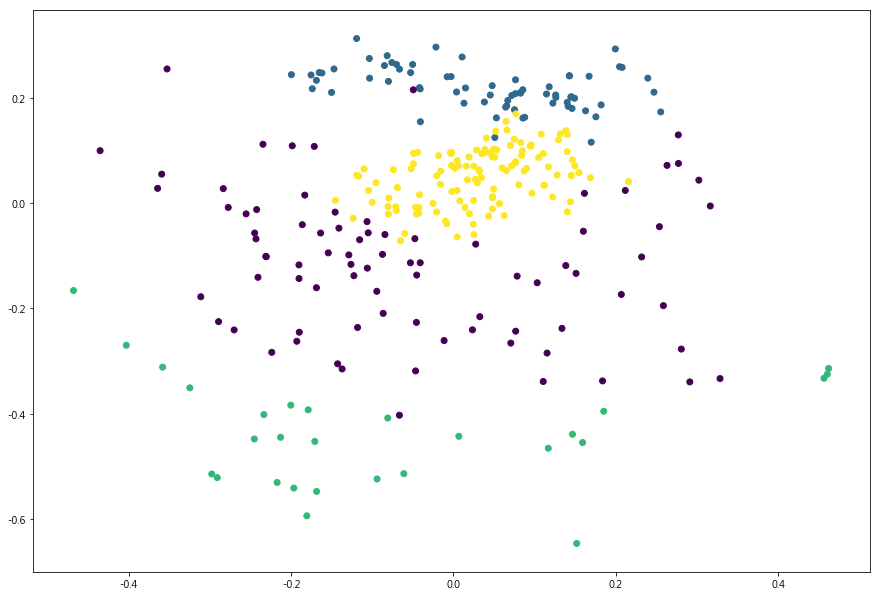

In [172]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.scatter(mds[:, 0], mds[:, 1], c=clustering.labels_)
plt.show()

# 繪製盒鬚圖

## 一. 抓出標準差

In [173]:
SD = np.std(NAV, axis=1, ddof=1)
SD = pd.DataFrame(data={'SD':SD, 'label':clustering.labels_})

In [174]:
SD

,SD,label
0,0.126593,3
1,0.046501,1
2,0.218804,0
3,0.132005,1
4,17.221305,3
5,1.235085,1
6,0.251014,1
7,0.225060,3
8,1.085221,0
9,1.134843,1


In [175]:
mean = np.mean(rate, axis=1)
mean = pd.DataFrame(data={'mean':mean, 'label':clustering.labels_})

In [176]:
mean

,mean,label
0,-6.415561e-04,3
1,6.088745e-04,1
2,-2.935136e-04,0
3,-1.386996e-03,1
4,-1.403405e-03,3
5,1.487927e-03,1
6,-1.041984e-03,1
7,-8.532002e-04,3
8,-3.363006e-04,0
9,-2.396587e-04,1


## 二.繪圖

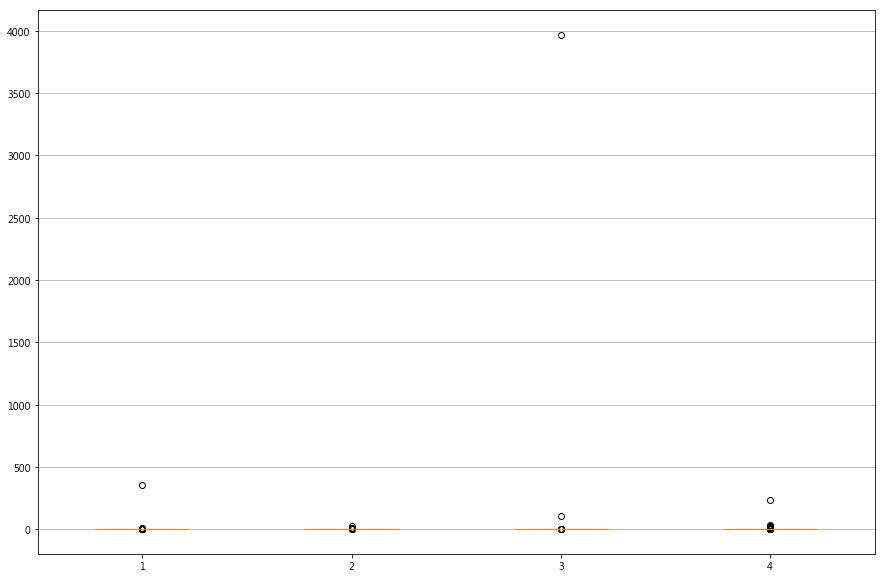

In [177]:
plt.figure(figsize=(15, 10))
plt.grid(axis='y')
plt.boxplot([SD[SD['label'] == 0]['SD'].values,
             SD[SD['label'] == 1]['SD'].values,
             SD[SD['label'] == 2]['SD'].values,
             SD[SD['label'] == 3]['SD'].values])
plt.show()

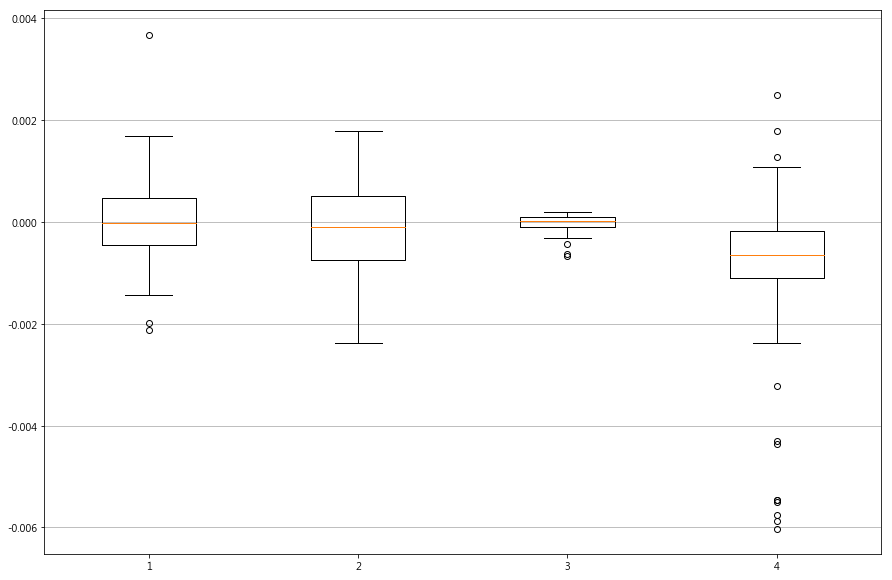

In [178]:
plt.figure(figsize=(15, 10))
plt.grid(axis='y')
plt.boxplot([mean[mean['label'] == 0]['mean'].values,
             mean[mean['label'] == 1]['mean'].values,
             mean[mean['label'] == 2]['mean'].values,
             mean[mean['label'] == 3]['mean'].values])
plt.show()

# 5.抓出四支基金

In [179]:
camp = pd.DataFrame(data=clustering.labels_, index=names,columns=['label'])
name_choose = []
start = getTimeStamp(year+'-01-01')
end = getTimeStamp(year+'-12-31')
for i in range(4):
    name_choose.append(camp[camp['label'] == i].sample(n=1).index[0])

In [180]:
name_choose

['CTYK1 美盛全球固定A$a', 'MFZG4 MFS歐價值A1-USD', 'T2702Y 宏利萬利貨幣市場', 'ISZ81 景順新貨幣債Ceh']

# 抓出四支基金各項數據

## 一. 淨值

In [181]:
NAV_choose = getNAV(name_choose, start, end)

In [182]:
NAV_choose

array([[146.36  , 146.73  , 147.15  , 147.66  , 148.03  , 148.    ,
        148.01  , 148.6   , 148.33  , 149.18  , 149.18  , 148.96  ,
        148.82  , 149.41  , 149.98  , 150.34  , 150.56  , 150.34  ,
        150.1   , 150.1   , 149.4   , 149.96  , 149.23  , 149.49  ,
        148.47  , 148.05  , 147.21  , 146.46  , 147.56  , 147.86  ,
        148.08  , 148.45  , 148.26  , 147.76  , 147.25  , 146.59  ,
        146.06  , 144.48  , 144.02  , 143.65  , 144.21  , 144.44  ,
        143.38  , 143.78  , 143.92  , 145.14  , 144.72  , 146.04  ,
        147.18  , 147.44  , 147.1   , 146.15  , 146.15  , 146.15  ,
        146.15  , 146.15  , 146.87  , 147.45  , 147.8   , 146.95  ,
        146.45  , 145.78  , 146.53  , 146.75  , 147.14  , 146.8   ,
        146.1   , 145.95  , 145.72  , 146.14  , 146.35  , 146.92  ,
        147.41  , 147.21  , 146.55  , 145.44  , 145.12  , 144.82  ,
        144.87  , 146.01  , 144.68  , 144.44  , 145.09  , 145.97  ,
        146.91  , 145.85  , 145.13  , 145.14  , 

## 二.配息

In [183]:
interest_choose = 0
for name in name_choose:
    interest_choose += (pd.read_sql(sql='select interest from interest where date between ? and ? and id = ?'
                                ,con = engine, params=[start,end,name])['interest'].sum())

In [184]:
interest_choose

0

## 三. 漲跌幅

In [185]:
temp = np.zeros((len(name_choose), len(NAV_choose[0])-1))
for j in range (len(name_choose)):
    for i in range (len(NAV_choose[0])-1):
        temp[j][i] = (NAV_choose[j][i+1] - NAV_choose[j][i]) / NAV_choose[j][i]

rate_choose = []
for i in range(len(temp[0])):
    rate_choose.append((temp[0][i] + temp[1][i] + temp[2][i] + temp[3][i])/4)

In [186]:
rate_choose

[-0.0046905163012046615,
 0.0018568460771790415,
 0.007923403738357586,
 0.0011368486366638432,
 0.002901406741197979,
 -0.0010597333676905184,
 -0.0002658543016994975,
 0.004761011435361038,
 0.0013141847041199673,
 0.0003841526024435043,
 0.0014618909691967528,
 0.002329614712054239,
 -0.002087420284747826,
 0.006266821253841902,
 0.003278588826629973,
 -0.0013887568522028774,
 -0.0014349430847398629,
 0.0014862050897376268,
 3.698279560339907e-06,
 -0.004727900986595703,
 0.005503391352457482,
 -0.0001550363956449787,
 -0.0007168303370905067,
 -0.003135656024230382,
 -0.005694753817660516,
 -0.0007434673003305719,
 -0.003706859638888099,
 0.004111023792470888,
 0.003199666145165878,
 0.00439167172807537,
 0.0028213923401303443,
 5.313832191563249e-05,
 -0.004510091271993174,
 -0.004240944439226125,
 -0.003843718767340011,
 -0.00092582648521844,
 -0.0055992127783957785,
 -0.008304509600365915,
 -0.0077864617504586385,
 0.0019442603172573334,
 0.003627170266384854,
 -0.004653888212180

## 四. 收益率

In [187]:
profit_choose = []
temp = NAV_choose[0][0] + NAV_choose[1][0] + NAV_choose[2][0] + NAV_choose[3][0]
for i in range(len(NAV_choose[0])):
    profit_choose.append((NAV_choose[0][i] + NAV_choose[1][i] + NAV_choose[2][i] + NAV_choose[3][i] - temp) / temp * 100)
profit_choose[-1] += interest_choose / temp * 100 

In [188]:
profit_choose

[0.0,
 0.012545798839036273,
 0.26896057255823386,
 0.7798682103871772,
 0.9685356703754181,
 1.056569807760985,
 1.0394861667886426,
 1.304709692884175,
 1.3443757717668314,
 1.7899918692546122,
 1.7970388711557226,
 1.7640460895278793,
 1.766128158271376,
 1.9278888837281887,
 2.42795908681531,
 2.7418709896820106,
 2.7814302958085713,
 2.6019452928429625,
 2.5958058593685376,
 2.595912632124618,
 2.096109360927668,
 2.551174847328298,
 2.1808869292528965,
 2.3230014675915367,
 1.6939497751632546,
 1.3421869302672387,
 0.9550289167316711,
 0.508024773414857,
 1.1972963002706074,
 1.4271780441046287,
 1.74840388076258,
 1.984958921851414,
 1.8680427539469722,
 1.5226328880375426,
 1.1299760775640038,
 0.7073161226327885,
 0.44625673402424965,
 -0.524467777850761,
 -0.9836440153603292,
 -1.3929039894038782,
 -1.033026415046006,
 -0.836457771108055,
 -1.4440481395648097,
 -1.12671950850365,
 -1.0979976371189266,
 -0.2974155120527861,
 -0.4506344170234197,
 0.4172145443712689,
 1.2211600

# 繪製漲跌幅對比圖

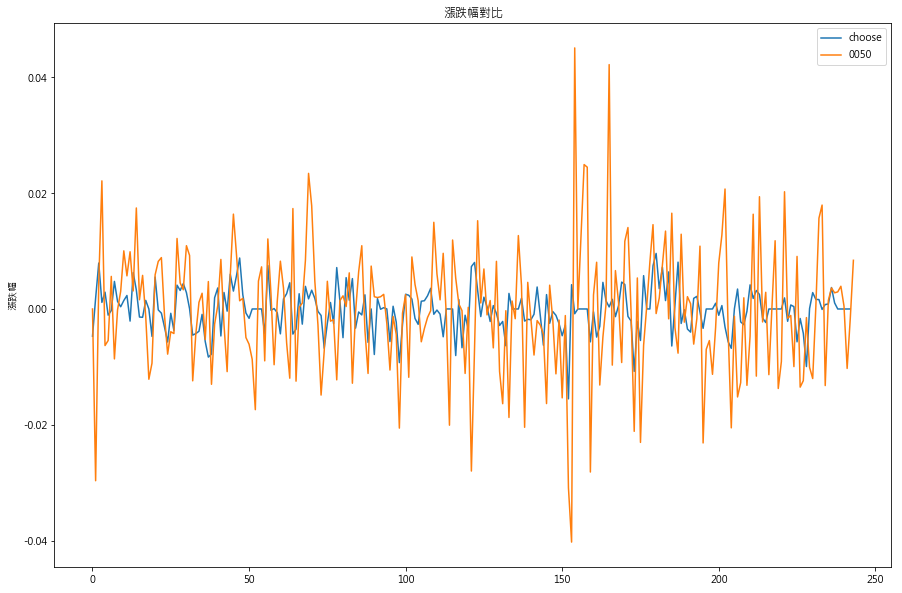

In [189]:
plt.figure(figsize=(15, 10))
plt.ylabel('漲跌幅')
plt.title('漲跌幅對比')
plt.plot(rate_choose)
plt.plot(rate_0050)
plt.legend(['choose','0050'])
plt.show()

# 繪製收益率對比圖

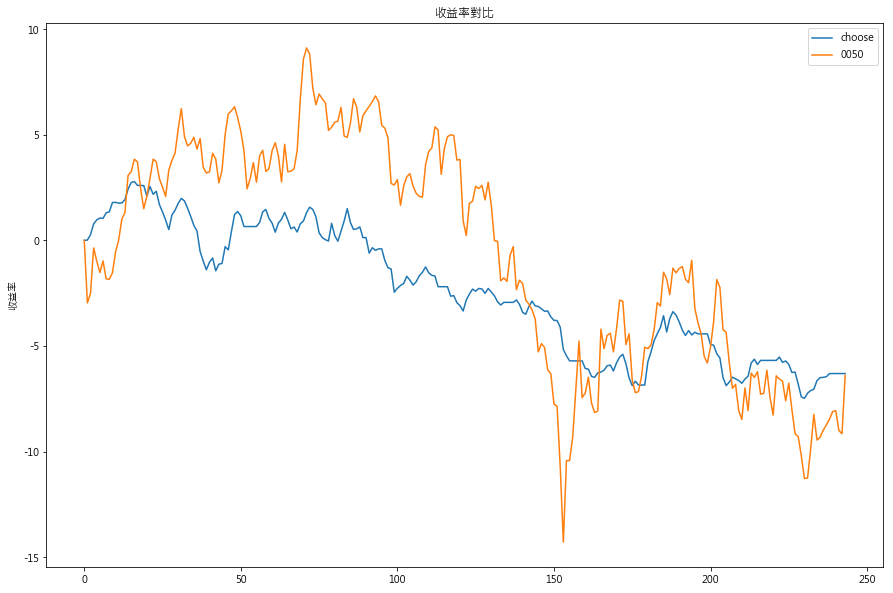

In [190]:
plt.figure(figsize=(15, 10))
plt.ylabel('收益率')
plt.title('收益率對比')
plt.plot(profit_choose)
plt.plot(profit_0050)
plt.legend(['choose','0050'])
plt.show()

In [114]:
date = pd.read_sql(sql='select distinct datetime(date, "unixepoch") from price where date between ? and ? order by date asc',
                    con=engine, params=[start, end])

In [115]:
date['profit'] = profit_choose

In [116]:
date.rename(columns={'datetime(date, "unixepoch")':'date'}, inplace = True)

In [117]:
date.loc[1,'date']

'2015-01-06 00:00:00'

In [118]:
from datetime import datetime

In [119]:
for i,j in enumerate(date['date']):
     date.loc[i,'date'] = datetime.strptime(j, '%Y-%m-%d %H:%M:%S')

In [120]:
date

,date,profit
0,2015-01-05 00:00:00,0.000000
1,2015-01-06 00:00:00,-0.962446
2,2015-01-07 00:00:00,-0.641630
3,2015-01-08 00:00:00,0.509530
4,2015-01-09 00:00:00,0.471787
5,2015-01-12 00:00:00,0.415173
6,2015-01-13 00:00:00,0.679373
7,2015-01-14 00:00:00,0.377430
8,2015-01-15 00:00:00,0.679373
9,2015-01-16 00:00:00,0.471787


In [121]:
date.index = date.date

In [122]:
date = date.drop('date', axis=1)

In [123]:
from bokeh.models import HoverTool

In [124]:
p = figure(x_axis_type="datetime", plot_width=500, plot_height=500, title="Profit")
p.line(x='date',y= 'profit', line_width=2, source=date)
p.add_tools(HoverTool(tooltips=[("datetime", "@date{%F}"), ("profit", "@profit")], formatters={'date':'datetime',},
                     mode='vline'))
show(p)